
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [3]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler


## Pre processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Selecao de modelos
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Avaliar classificador
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import xgboost as xgb

Configuração gráfica

In [5]:
%matplotlib inline

In [6]:
sns.set_style('darkgrid')

Importação dos dados

In [7]:
path = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train_under_sample.csv'

In [8]:
dados = pd.read_csv(path)
# dados_brutos_teste = pd.read_csv(path_test)

In [9]:
dados.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0,1,3,0,0,1,0,0,0,0,...,1,2,5,0,1,1,0,0,0,0
1,1,1,2,0,0,1,0,0,0,0,...,3,2,7,0,1,1,0,0,1,0
2,1,1,2,0,0,1,0,0,0,0,...,2,3,8,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,...,1,1,8,0,0,0,1,0,0,0
4,1,1,3,1,0,0,1,0,0,0,...,2,4,5,0,1,0,0,0,0,0


In [10]:
from collections import Counter

In [11]:
Counter(dados.iloc[:,-1])

Counter({0: 19150, 1: 19150})

---

# Modelos de Aprendizado de Máquina

## Importando bibliotecas

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

In [13]:
X = dados.iloc[:, :-1]
y = dados.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressão Logística

In [25]:
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['saga'], 
        'random_state': [42],
        'max_iter': [500]
    }, 
    {
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky', 'newton-cg'], 
        'random_state': [42],
        'max_iter': [500]
    },
    {
        'penalty': ['elasticnet'], 
        'solver': ['saga'], 
        'l1_ratio': [0.5],
        'random_state': [42],
        'max_iter': [500]
    }    
]

In [26]:
estimator = LogisticRegression()
cv = 3

In [27]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [28]:
clf.fit(X_train, y_train)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [500], 'penalty': ['l1'],
                          'random_state': [42], 'solver': ['saga']},
                         {'max_iter': [500], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky',
                                     'newton-cg']},
                         {'l1_ratio': [0.5], 'max_iter': [500],
                          'penalty': ['elasticnet'], 'random_state': [42],
                          'solver': ['saga']}],
             scoring='f1')

Predição:

In [29]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [31]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      5753
           1       0.81      0.73      0.77      5737

    accuracy                           0.78     11490
   macro avg       0.78      0.78      0.78     11490
weighted avg       0.78      0.78      0.78     11490



<Axes: >

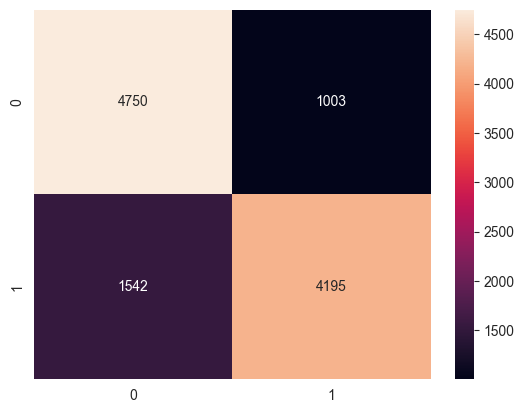

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [35]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7785
AUC: 0.8556


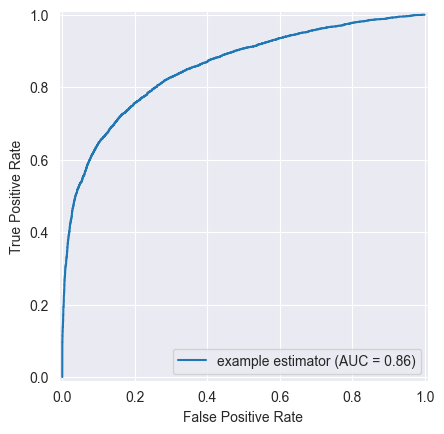

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Random Forest

In [37]:
param_grid = [
    {
        'n_estimators': [10, 20, 50, 100, 150, 200],
        'criterion': ['gini', 'entropy', 'log_loss'], 
        'random_state': [42]
    }    
]

In [38]:
estimator = RandomForestClassifier()
cv = 3

In [39]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [40]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [10, 20, 50, 100, 150, 200],
                          'random_state': [42]}],
             scoring='f1')

Predição:

In [41]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [42]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5753
           1       0.86      0.82      0.84      5737

    accuracy                           0.85     11490
   macro avg       0.85      0.85      0.85     11490
weighted avg       0.85      0.85      0.85     11490



<Axes: >

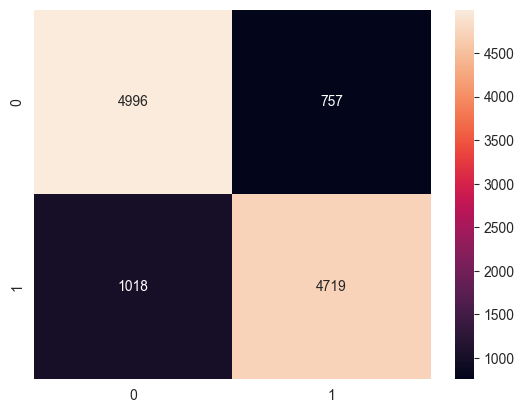

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [45]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8455
AUC: 0.9198


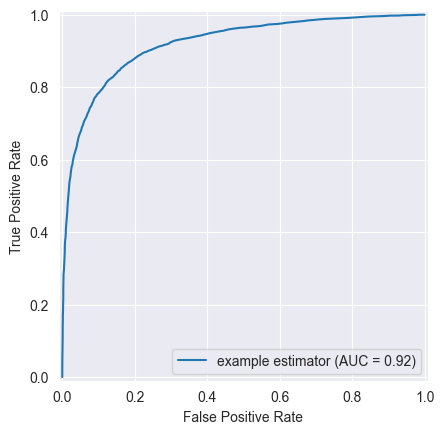

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Gradient Boosting Classifier

In [47]:
param_grid = [
    {
        'n_estimators': [10, 20, 50, 100],
        'criterion': ['friedman_mse', 'squared_error'], 
        'random_state': [42]
    }    
]

In [49]:
estimator = GradientBoostingClassifier()
cv = 3

In [50]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [51]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'n_estimators': [10, 20, 50, 100],
                          'random_state': [42]}],
             scoring='f1')

Predição:

In [52]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [53]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      5753
           1       0.90      0.81      0.85      5737

    accuracy                           0.86     11490
   macro avg       0.86      0.86      0.86     11490
weighted avg       0.86      0.86      0.86     11490



<Axes: >

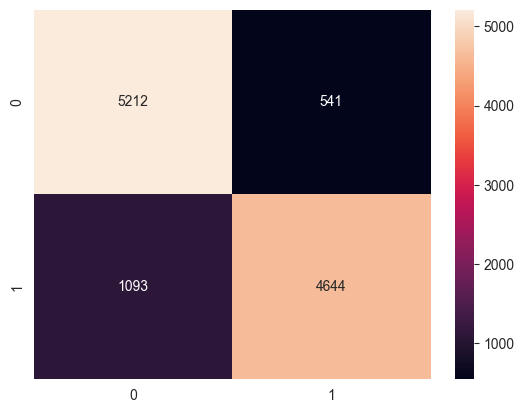

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [55]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8578
AUC: 0.9311


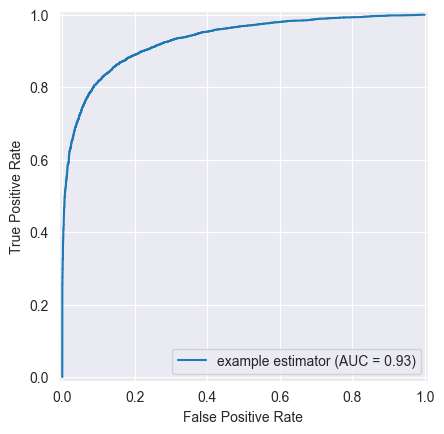

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## KNN

In [74]:
param_grid = [
    {
        'n_neighbors': [5, 10, 20, 50, 100],
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto'],
        'p' : [1,2]
    }    
]

In [75]:
estimator = KNeighborsClassifier()
cv = 3

In [76]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [77]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'],
                          'n_neighbors': [5, 10, 20, 50, 100], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='f1')

Predição:

In [78]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [79]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      5753
           1       0.88      0.46      0.61      5737

    accuracy                           0.70     11490
   macro avg       0.76      0.70      0.68     11490
weighted avg       0.76      0.70      0.68     11490



<Axes: >

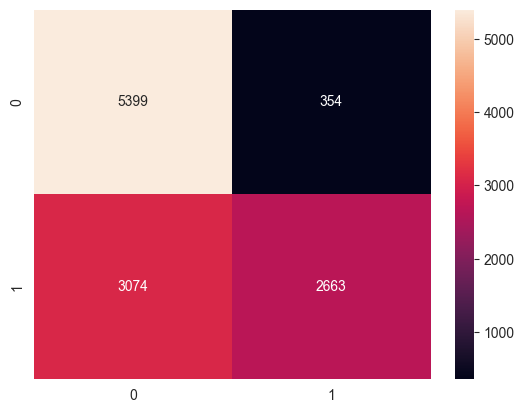

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [82]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7017
AUC: 0.7451


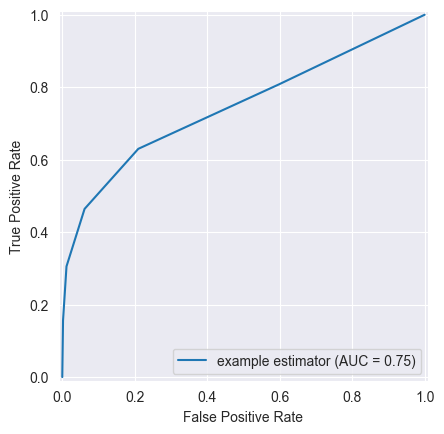

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## SVM

In [42]:
param_grid = [
    {
        #'C': [0.5, 1.0, 2.0],
        'C': [1.0],
        # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'kernel': ['rbf'],
        'random_state' : [42],
        'probability': [True]
    }    
]

In [43]:
estimator = SVC()
cv = 3

In [44]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [45]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1.0], 'kernel': ['rbf'], 'probability': [True],
                          'random_state': [42]}],
             scoring='f1')

Predição:

In [46]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [47]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      5753
           1       0.84      0.70      0.76      5737

    accuracy                           0.78     11490
   macro avg       0.79      0.78      0.78     11490
weighted avg       0.79      0.78      0.78     11490



<Axes: >

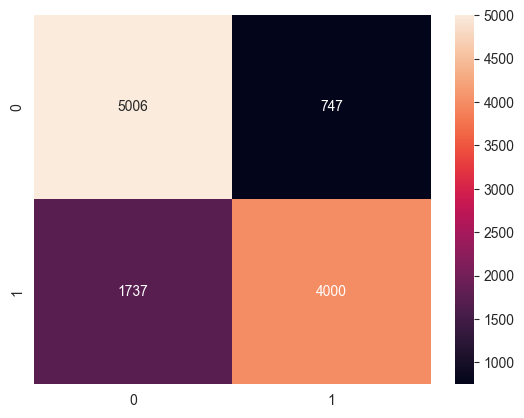

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [49]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7838
AUC: 0.8619


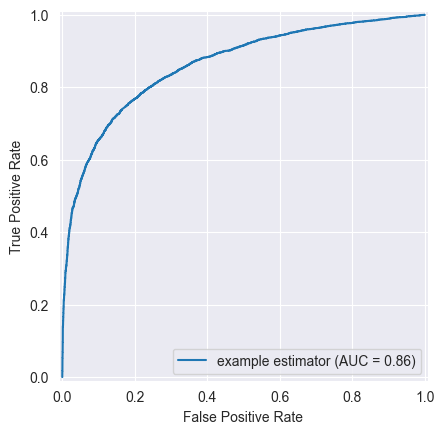

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## XGBOOST

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter

In [21]:
model = XGBClassifier()

In [22]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)


In [23]:
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.93855


In [24]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Predição:

In [25]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [26]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5753
           1       0.89      0.84      0.87      5737

    accuracy                           0.87     11490
   macro avg       0.87      0.87      0.87     11490
weighted avg       0.87      0.87      0.87     11490



<Axes: >

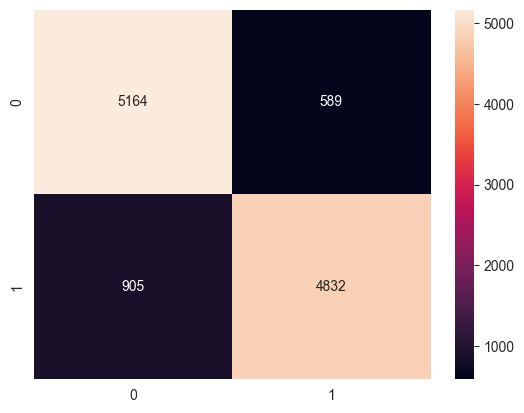

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.0f')

In [29]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8700
AUC: 0.9396


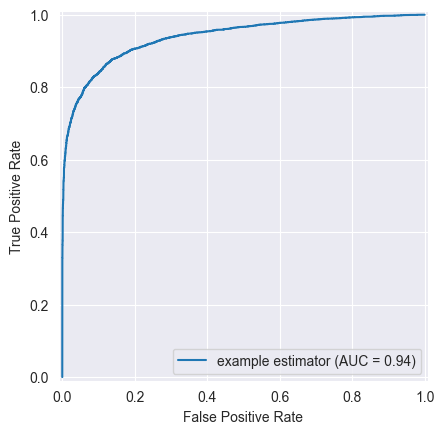

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()